![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Parameter estimation in geometric models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://www.dropbox.com/s/0nmcsy5957d4zyw/Xmatrix.npy
X = np.load('Xmatrix.npy')

--2023-08-29 14:42:39--  https://www.dropbox.com/s/0nmcsy5957d4zyw/Xmatrix.npy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/0nmcsy5957d4zyw/Xmatrix.npy [following]
--2023-08-29 14:42:40--  https://www.dropbox.com/s/raw/0nmcsy5957d4zyw/Xmatrix.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4e6b868e6c8711b237fad18896.dl.dropboxusercontent.com/cd/0/inline/CCvqMdncjTAkB98pGk9fE0wsK-HqAAeiptG1fzOXDoLQHodG5R-7X7dhgNm6RKjmvDhtexBJVN-NHrn3_RhYIRBrc8oH90UV66EIl-4OirMwlF3nxLxAAm0HWjJJEnCJXnY/file# [following]
--2023-08-29 14:42:41--  https://uc4e6b868e6c8711b237fad18896.dl.dropboxusercontent.com/cd/0/inline/CCvqMdncjTAkB98pGk9fE0wsK-HqAAeiptG1fzOXDoLQHodG5R-7X7dhgNm6RKjmvDhtexBJVN-NHrn3_RhYIRBrc8oH90UV66EIl-4OirMwlF3nxLxAAm0HWjJJE

In [ ]:
# Solution 1

def Xestimation1(X):
  (n,m) = X.shape
  print('(n,m)  = ',(n,m))

  Q = X[:,0:m-1]
  r = -X[:,m-1]

  a_prime = np.linalg.lstsq(Q,r, rcond=None)[0]
  a_hat   = np.ones((m,))
  a_hat[0:m-1] = a_prime

  z = np.dot(X,a_hat)
  na = np.linalg.norm(a_hat)
  nz = np.linalg.norm(z)
  print('a      = ',a_hat)
  print('||a||  = ',na)
  print('||Xa|| = ',nz)
  return a_hat

a_hat = Xestimation1(X)


(n,m)  =  (8, 9)
a      =  [ 2.52366729e-01 -2.51597569e-01  3.79442292e+02 -1.28944843e-01
  1.64478136e-01  3.28881743e+02 -2.15149554e-04 -3.58862733e-04
  1.00000000e+00]
||a||  =  502.13626115263895
||Xa|| =  1.625858831095118e-08


In [ ]:
# Solution 2
def Xestimation2(X):
  [U,S,V] = np.linalg.svd(X)
  a_hat   = V[-1,:]
  z = np.dot(X,a_hat)
  na = np.linalg.norm(a_hat)
  nz = np.linalg.norm(z)
  print('a      = ',a_hat)
  print('||a||  = ',na)
  print('||Xa|| = ',nz)
  return a_hat

a_hat = Xestimation2(X)


a      =  [ 5.02586148e-04 -5.01054373e-04  7.55656027e-01 -2.56792534e-04
  3.27556779e-04  6.54965134e-01 -4.28468467e-07 -7.14672014e-07
  1.99149131e-03]
||a||  =  0.9999999999999999
||Xa|| =  2.9444764309822103e-13


# Example: Straight line

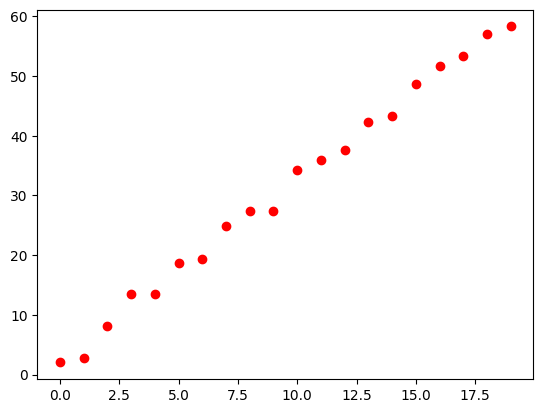

In [ ]:
# Equation of the straight line:
# a[0]*x + a[1]*y + a[2] = 0
a = np.array([1.5,-0.5,1])

n = 20
x = np.array(range(n))
y = -(a[0]*x+a[2])/a[1]+ 5*(np.random.random((n,))-0.5)
plt.scatter(x,y,c='Red')
plt.show()

a      =  [-0.65043629  0.22047548 -0.72685844]
||a||  =  1.0
||Xa|| =  1.3671381688256534


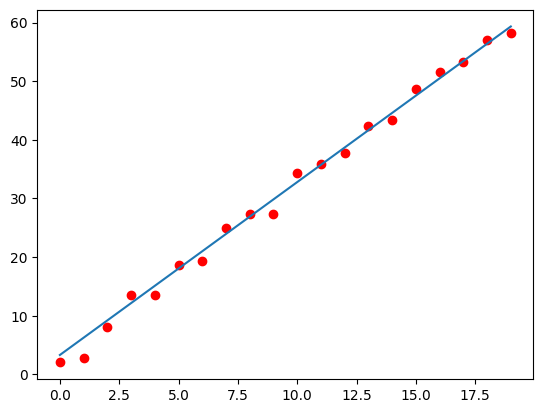

In [ ]:
X = np.zeros((n,3))
for i in range(n):
  X[i,:] = [x[i],y[i],1]

a_hat = Xestimation2(X)
ys = -(a_hat[0]*x+a_hat[2])/a_hat[1]

plt.scatter(x,y,c='Red')
plt.plot(x,ys)
plt.show()


# RANSAC: Random sample consensus

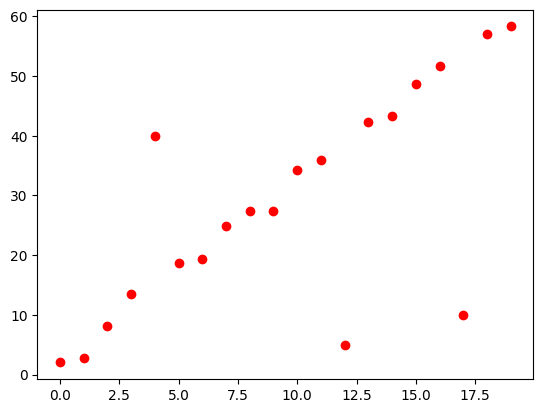

In [ ]:
# outliers
y[17] = 10
y[12] = 5
y[4]  = 40

X = np.zeros((n,3))
for i in range(n):
  X[i,:] = [x[i],y[i],1]


plt.scatter(x,y,c='Red')
plt.show()

a      =  [ 0.0442865   0.01170995 -0.99895024]
||a||  =  1.0
||Xa|| =  2.210339158702137


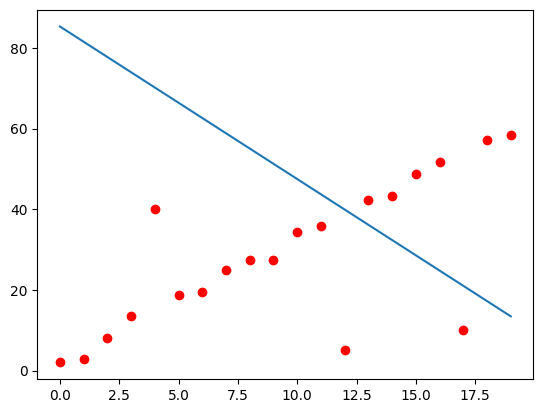

In [ ]:
# Parameter estimation without removing the outliers
a_hat = Xestimation2(X)
ys = -(a_hat[0]*x+a_hat[2])/a_hat[1]

plt.scatter(x,y,c='Red')
plt.plot(x,ys)
plt.show()


In [ ]:
# RANSAC: Parameter estimation removing the outliers

th = 4      # margin
ol_min = n
for k in range(100):
  j  = np.random.permutation(n)
  i  = j[0:2]
  Qi = X[i,0:2]
  ri = np.array([-1,-1])
  ti = np.dot(np.linalg.inv(Qi),ri)
  ai = np.array([ti[0],ti[1],1])

  ysi = -(ai[0]*X[:,0]+ai[2])/ai[1]
  ei = np.abs(y-ysi)
  ol = np.sum(np.abs(ei)>th)
  if ol<ol_min:
    ol_min = ol
    ys = ysi
    a_hat = ai
    print('outliers = ',ol_min)

print('ell =',a_hat)

outliers =  17
outliers =  16
outliers =  3
ell = [ 1.59934474 -0.51508765  1.        ]


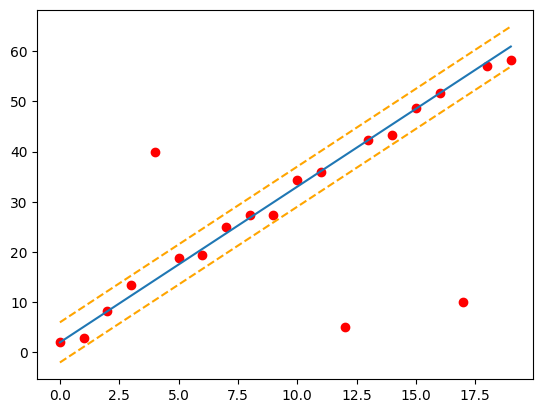

In [ ]:
plt.scatter(x,y,c='Red')
plt.plot(x,ys)
plt.plot(x,ys+th,c='Orange',linestyle='dashed')
plt.plot(x,ys-th,c='Orange',linestyle='dashed')
plt.show()